In [2]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats
from statsmodels.distributions.empirical_distribution import ECDF

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

# Test of Normality

## 1. QQ Plot (Quantile-Quantile Plot)

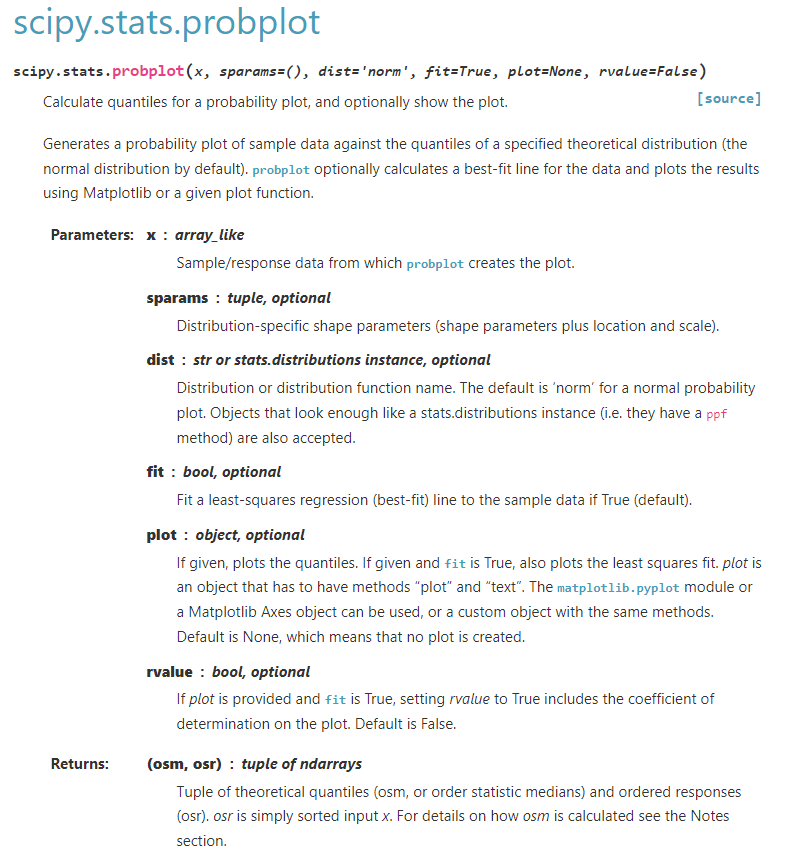

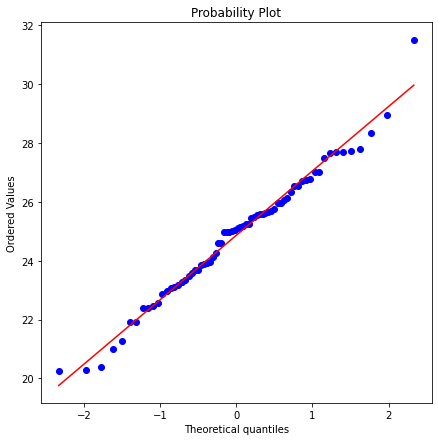

In [3]:
# QQ Plot for Normal Distribution

# Create a normal distribution
np.random.seed(12345)
y = np.random.normal(loc=25, scale=2, size=70)  # np.random.normal(mean, std, ndata)

# Plot
plt.figure(figsize=(7, 7))
stats.probplot(y, dist="norm", plot=pylab)
pylab.show()

In [4]:
# Import dataset
data_set = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M3/M3. bond_and_stock_data.csv")

## 2. Shapiro-Wilk Test

The Shapiro Wilk test uses the W statistic. The W statistic is the **correlation** between the <u> ordered observed data points </u> and the <u> theoretical data points on normal distribution. </u> If the W statistic is too small, the Shapiro–Wilk test rejects the normality hypothesis. 

In [5]:
# Shapiro Wilk normality test
shapiro_test = stats.shapiro(y)
print(f"Shapiro W: {shapiro_test.statistic} \nShapiro p-value {shapiro_test.pvalue}")

Shapiro W: 0.9852495193481445 
Shapiro p-value 0.5831896662712097


## Empirical Cumulative Distribution Function (ECDF)

The empirical distribution function is an **estimate** of the cumulative distribution function that generated the points in the sample, where the CDF is $F_{X_i}(t)$

$ECDF = \hat{F_n}(t) = \Large\frac{\text{number of elements in the event  } x_i \leq t}{\text{sample size}} = \frac{1}{n} \sum_{i=1}^{n} 1_{x_i \leq t} $

where $1_{x_i \leq t}$ is the **indicator** function which **counts** the number of times the event happened for the event $x_i \leq t$:

$$ \large1_{(x_{i} \leq t)}(x_i) = \begin{cases} 
  1  &  \text{ if } x_{i} \leq t \\ 
  0  &  \text{ if } x_{i} > t 
\end{cases} $$

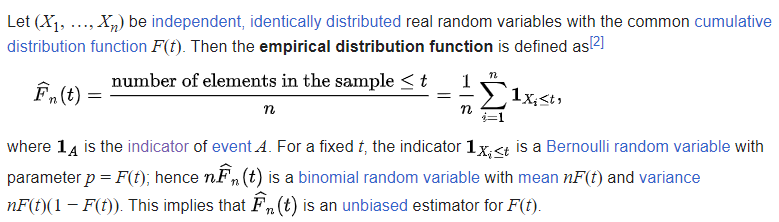

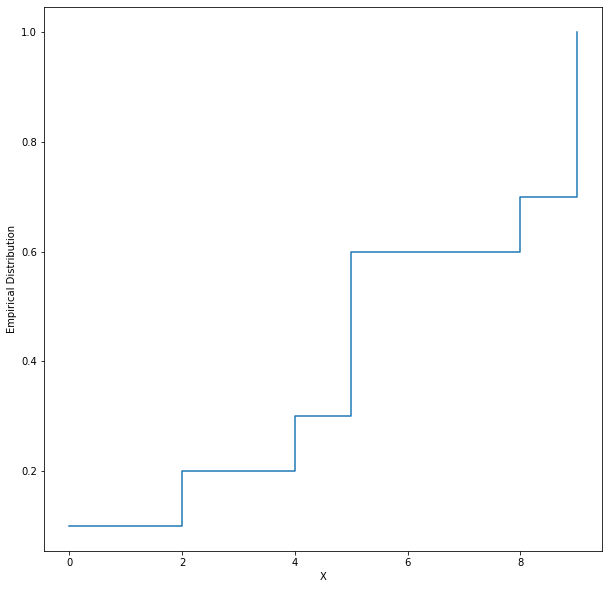

In [6]:
# Empirical Distribution function

M = [8, 9, 9, 0, 2, 4, 5, 5, 5, 9]

# Empirical Cumulative distribution function
ecd_function = ECDF(M)

# plot
plt.figure(figsize=(10, 10))
plt.plot(ecd_function.x[1:], ecd_function.y[1:], drawstyle="steps-post")
plt.xlabel("X")
plt.ylabel("Empirical Distribution")
plt.show()

**Figure 7: Empirical Distribution Function Overlays with Normal Cumulative Distribution Function**

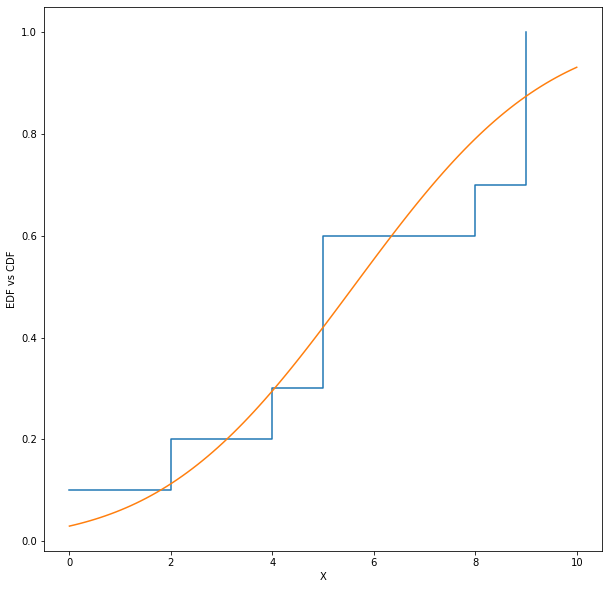

In [7]:
# EDF overlay with NCDF
plt.figure(figsize=(10, 10))

# EDF plot
plt.plot(ecd_function.x[1:], ecd_function.y[1:], drawstyle="steps-post")

# CDF plot
x = np.linspace(0, 10, 100)
y = stats.norm.cdf(x, np.mean(M), np.std(M))
plt.plot(x, y)

plt.xlabel("X")
plt.ylabel("EDF vs CDF")
plt.show()

We can overlap a theoretical distribution onto our empirical distribution plot to check if the data fits the theoretical distribution. In figure 7, a normal cumulative distribution is overlapped with the empirical distribution plot. From the plot, it seems the data fits the normal distribution. Let's do a Shapiro–Wilk test to see if the data also passes the normality test.

**Figure 8: Shapiro–Wilk Test for Observed Data**

In [8]:
# Shapiro Wilk Test for Observed Data
shapiro_testM = stats.shapiro(M)
print(
    "Shapiro W: {0} \nShapiro pvalue {1}".format(
        shapiro_testM.statistic, shapiro_testM.pvalue
    )
)

Shapiro W: 0.8973180651664734 
Shapiro pvalue 0.20468071103096008


Figure 8 shows the Shapiro–Wilk test result. The result shows the data passed the normality test. Hence, we can use normal distribution to describe our 10-observation data series.


__________________________

## **6. Asset Return Distributions and Normality Tests**

**Figure 9: Normal QQ Plot for U.S. 10-Year Treasury Bond Yield and Dow Jones Industrial Average Daily Returns**

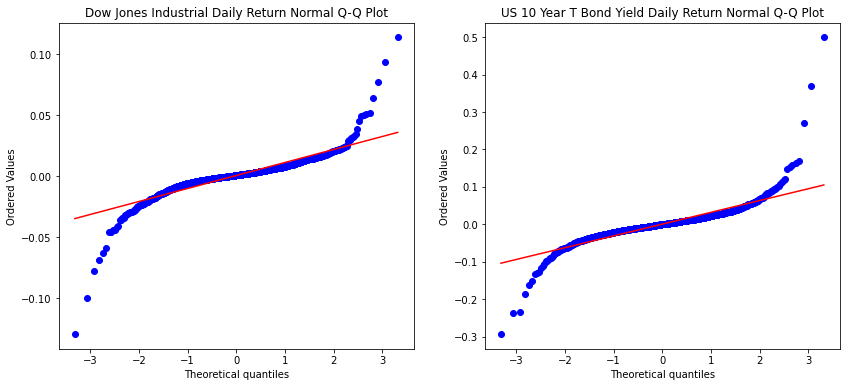

In [9]:
# Normal QQ plots
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
stats.probplot(data_set.DWJ, dist="norm", plot=pylab)
plt.title("Dow Jones Industrial Daily Return Normal Q-Q Plot")

ax2 = plt.subplot(122)
stats.probplot(data_set["10Y_TBY"], dist="norm", plot=pylab)
plt.title("US 10 Year T Bond Yield Daily Return Normal Q-Q Plot")
pylab.show()

From figure 9, we can see the daily returns for both assets are **not** normally distributed. They have a similar curvy look in the plots. These curves indicate they have more extreme values than a normal distribution. Hence, we need to find other distributions to describe these asset returns or we need to transform these asset returns.



In [10]:
# Shapiro Wilk Tests
shapiro_test10Y_TBY = stats.shapiro(data_set["10Y_TBY"])
print("10Y_TBY")
print(
    "Shapiro W: {0} \nShapiro pvalue {1}".format(
        shapiro_test10Y_TBY.statistic, shapiro_test10Y_TBY.pvalue
    )
)

shapiro_testDWJ = stats.shapiro(data_set.DWJ)
print("\nDWJ")
print(
    "Shapiro W: {0} \nShapiro pvalue {1}".format(
        shapiro_testDWJ.statistic, shapiro_testDWJ.pvalue
    )
)

10Y_TBY
Shapiro W: 0.7625222206115723 
Shapiro pvalue 4.044147368041422e-42

DWJ
Shapiro W: 0.7877278327941895 
Shapiro pvalue 1.821057419313316e-40


From figure 10, we see that both the U.S. 10 Year Treasury Bond Yield daily returns and DJ Industrial Average daily returns **did not pass** the Shapiro–Wilk Test. We cannot use normal distribution to describe these two asset daily returns.
